In [ ]:
!pip install multion -q

In [1]:
import multion


In [ ]:
multion.login()

running post
Server Disconnected. Please press connect in the Multion extention popup
Server Disconnected. Please press connect in the Multion extention popup
{'url': 'https://www.google.com/search?q=weather+today&sxsrf=AB5stBhfM2ra7AXPCpcSiDVgWqy5F0ySyA%3A1690001553438&source=hp&ei=kWC7ZJ31F8CC0PEP9_Om2AQ&iflsig=AD69kcEAAAAAZLtuoeV3w7tdcIx6Ws21Oc4cJd9NYfgc&ved=0ahUKEwjdgYqywqGAAxVAATQIHfe5CUsQ4dUDCAs&uact=5&oq=weather+today&gs_lp=Egdnd3Mtd2l6Ig13ZWF0aGVyIHRvZGF5MgoQIxiKBRgnGJ0CMgcQIxiKBRgnMgcQIxiKBRgnMgoQABiKBRixAxhDMgcQABiKBRhDMgsQABiABBixAxiDATILEAAYgAQYsQMYgwEyBRAAGIAEMgUQABiABDILEAAYgAQYsQMYgwFIyAFQAFgZcAF4AJABAJgBPqABPqoBATG4AQPIAQD4AQE&sclient=gws-wiz', 'screenshot': '', 'tabId': '1371659673', 'message': 'I am typing "weather today" into the Google search bar and then submitting the search to find the current weather.\n\n', 'status': 'CONTINUE'}

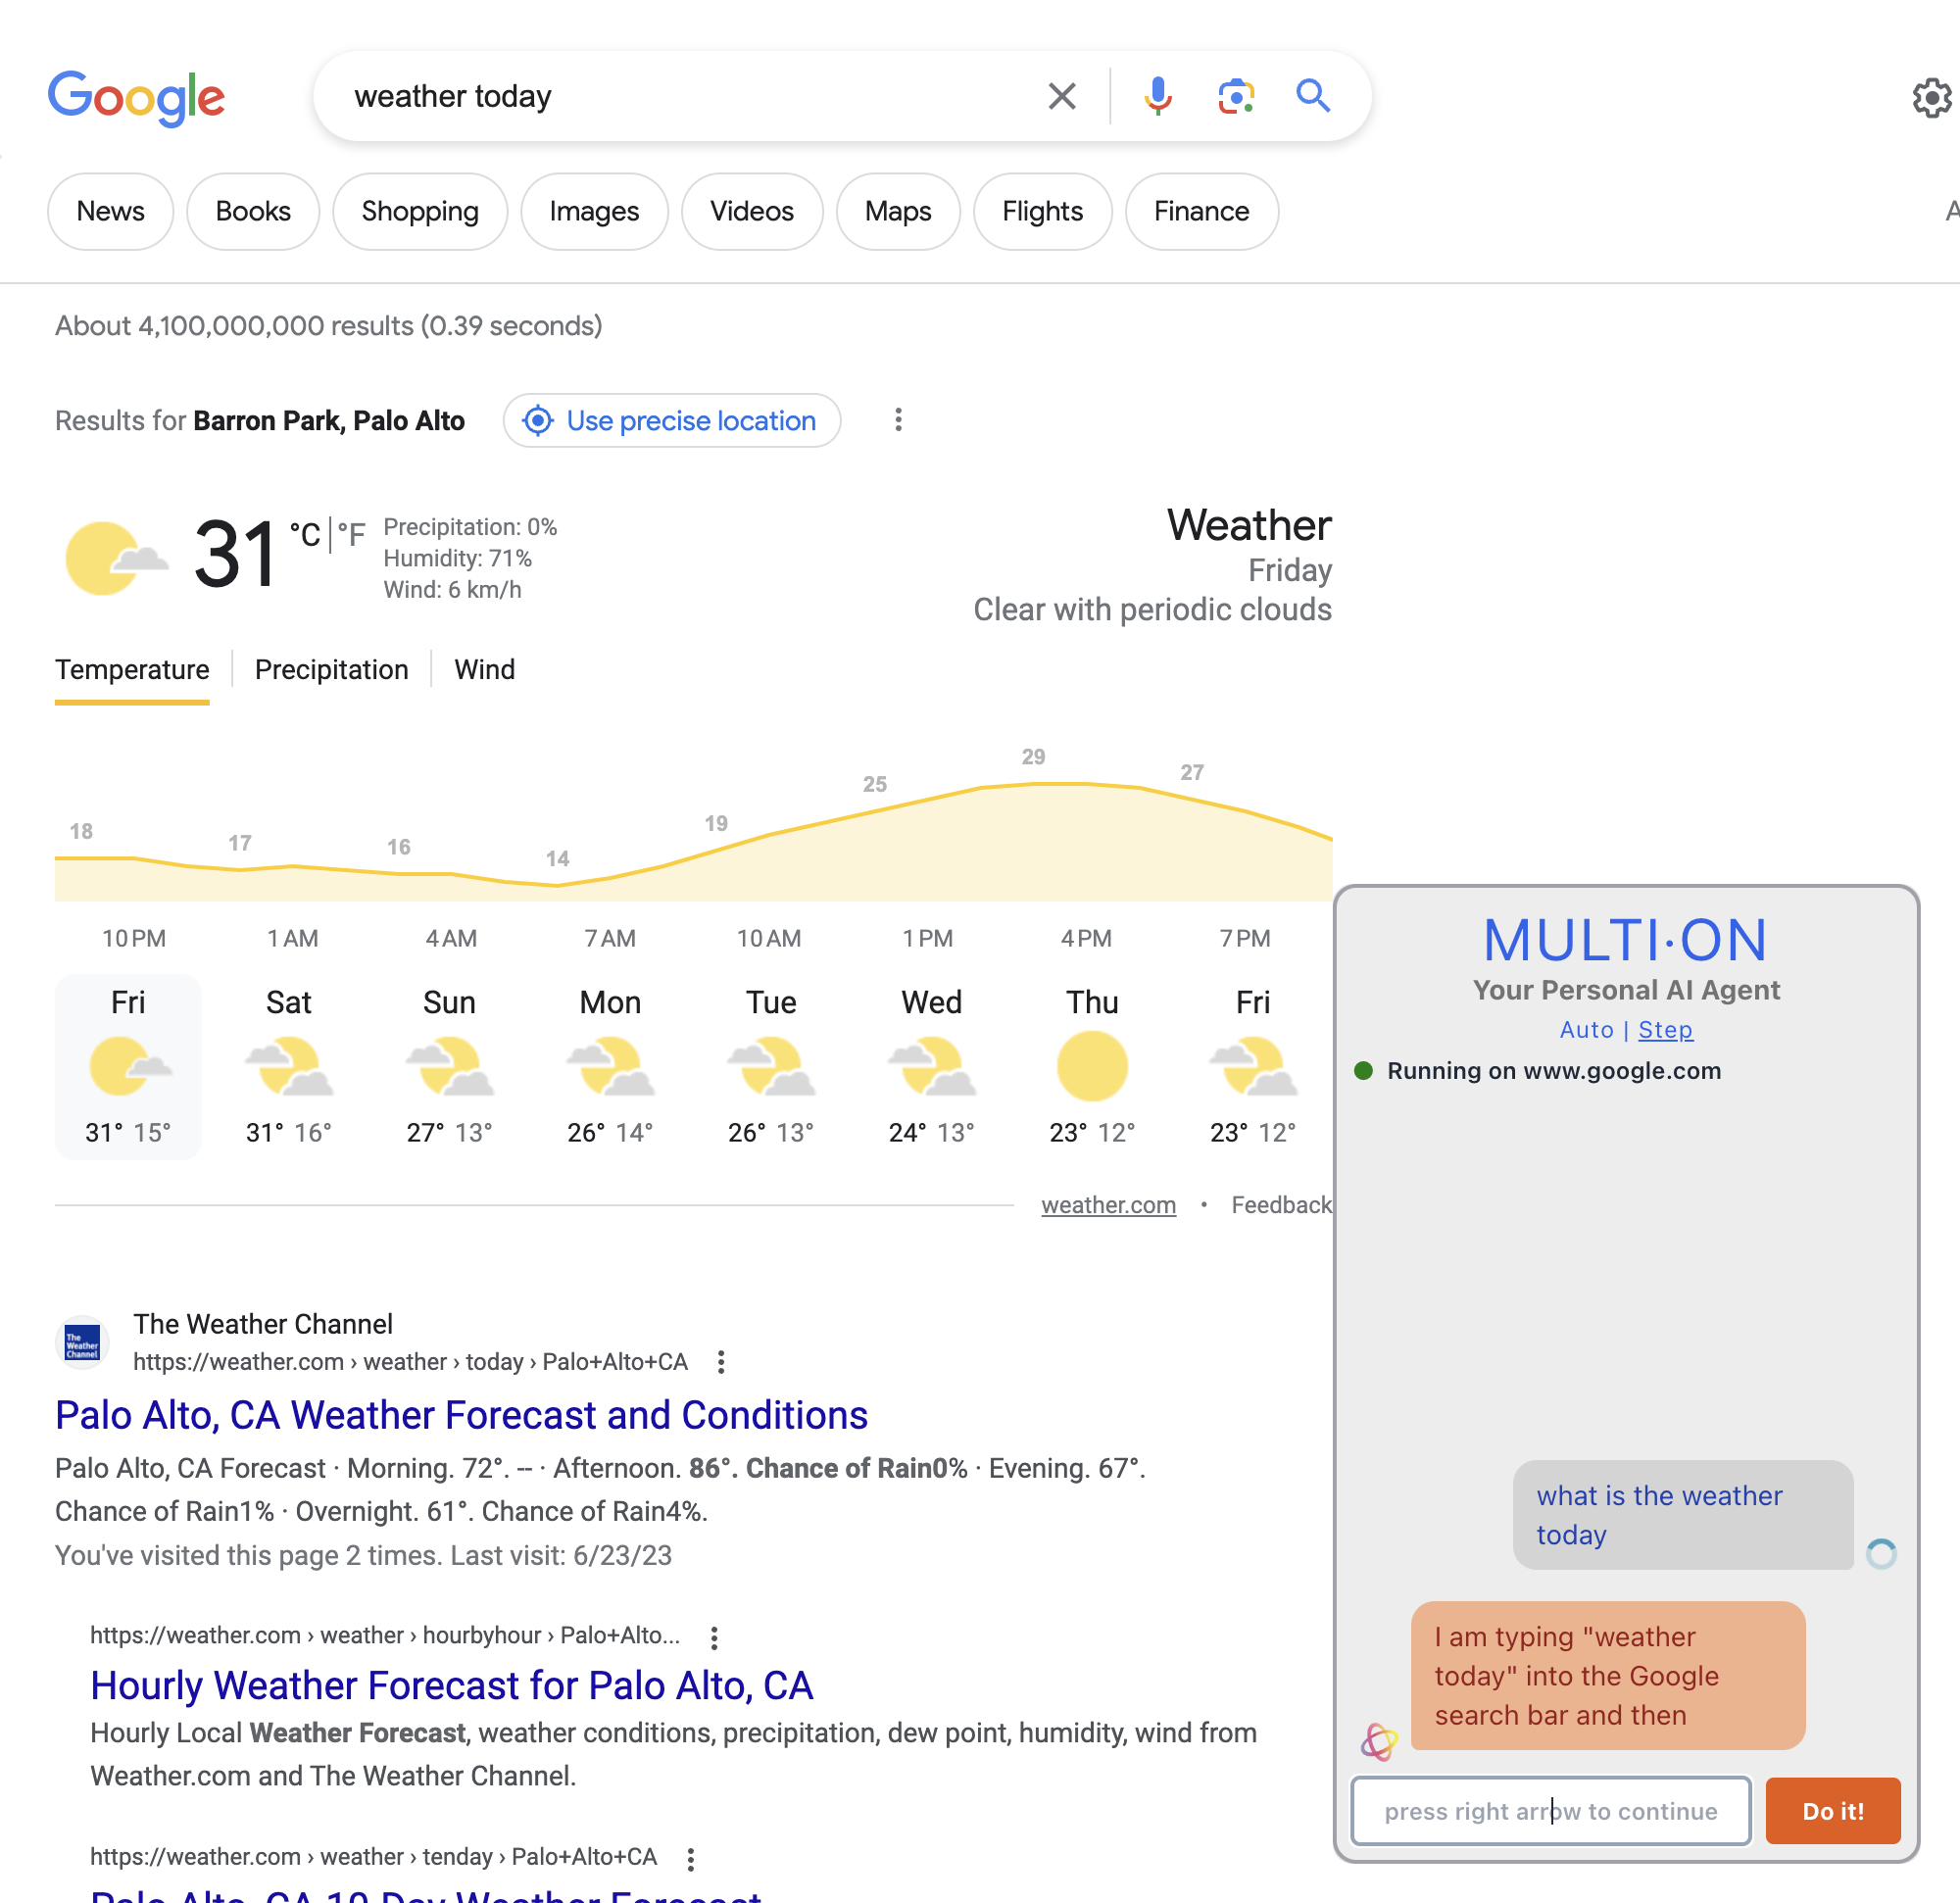

'1371659673'

In [3]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response)
tabId = response['tabId']
tabId

In [ ]:
response = multion.update_session(tabId, {"input": "what is the weather today","url": "https://www.google.com"})
response

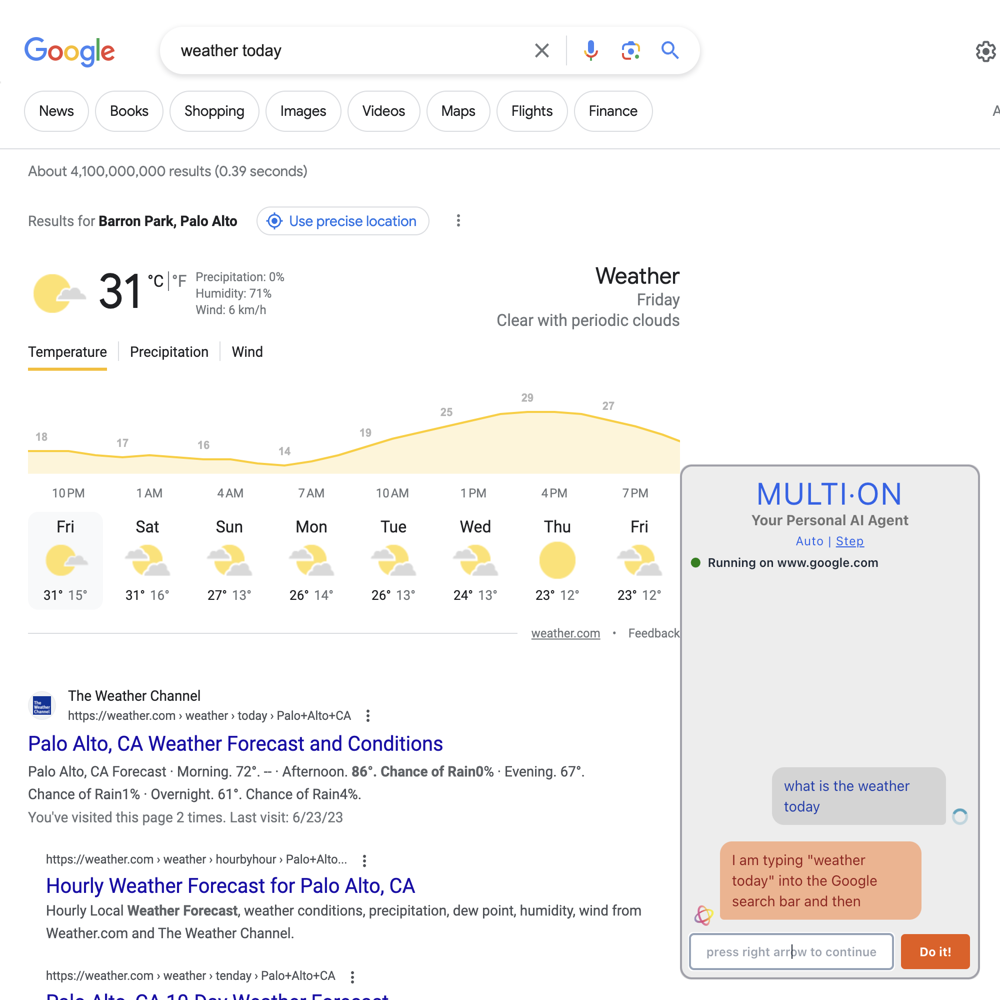

In [4]:
multion.get_screenshot(response, 1000, 1000)